# Exercise P2 - TDT 4265 Computer Vision and Deep Learning

Run the cell below to load the [**MNIST**](http://yann.lecun.com/exdb/mnist/) data set, which you will use in **Task 1 and Task 2**. 

As you recall from the class, we generally split the training set into train + vaildation as shows in the following image (This will be done at the end of this section).

![alt text](https://i.imgur.com/X6DMWIf.png)


In [2]:
print('Ensure that we have Keras installed')
!pip install -q keras
from keras.datasets import mnist

# The data, split between train and test sets
# x_train is a list of training images, y_train is a list og training lables
# x_test is a list of test images, y_test is a list of test lables
(x_train_entire, y_train_entire), (x_test, y_test) = mnist.load_data()


print('x_train_entire size: {}, y_train_entire size: {}'.format(len(x_train_entire), 
                                                                 len(y_train_entire)))
print('x_train size: {}, y_train size: {}\n'.format(len(x_test), len(y_test)))

# Show the format of one randomly chosen image and label (123)
image = x_train_entire[123]
label = y_train_entire[123]
print('Image shape: {}'.format(image.shape))
print('Label: {}'.format(label))

# Split x_train_entire and y_train_entire into training and validation
x_train    = x_train_entire[ :40000]
x_validate = x_train_entire[40001: ]
y_train    = y_train_entire[ :40000]
y_validate = y_train_entire[40001: ]

# Note that the split should be done randomly on each data image, 
# here we prepared a non-random split so that you can start your programming. 
# However, in general you should choose your train and validation images randomly.

Ensure that we have Keras installed
x_train_entire size: 60000, y_train_entire size: 60000
x_train size: 10000, y_train size: 10000

Image shape: (28, 28)
Label: 7


## Task 0: Create a helper function to plot and visulize the training
> **(might be smart to solve after Task 1)**

**Input:** history (keras history from the training)

### GOAL: 
1. Create a graph that plots **Loss vs epochs** and one that plots **Accuracy vs epochs** of the **training and validation set**

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

def plot_training_score(history):
  print('Availible variables to plot: {}'.format(history.history.keys()))
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation test'], loc='upper left')
  plt.show()
    
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation test'], loc='upper left')
  plt.show()  
  
  # TODO: Visulize the plot, to be applied after traing is complete

## Task 1 (20%): Classification using fully-connected neural networks 
#### Dataset:  [MNIST](http://yann.lecun.com/exdb/mnist/)
### Subtask 1.1
1. Print the model structure 
2. Visualize the training as it progresses (Task 0) - static plot when training is complete is OK
3. Output the final score of the test set, **should be above 90%**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None
Train on 40000 samples, validate on 19999 samples
Epoch 1/10
40000/40000 [==============================] - 2s 61us/step - loss: 0.3736 - acc: 0.8976 - val_loss: 0.2036 - val_acc: 0.9425
Epoch 2/10
40000/40000 [==============================] - 1s 21us/step - loss: 0.1626 - acc: 0.9543 - val_loss: 0.1582 - val_acc: 0.9540
Epoch 3/10
40000/40000 [==============================] - 1s 21us/step - loss: 0.1122 - acc: 0.9674 - val_loss: 0.1348 - val_acc: 0.9600
Epoch 4/10
40000/40000 [==============================] - 1s 21us/

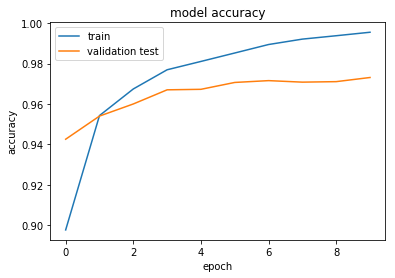

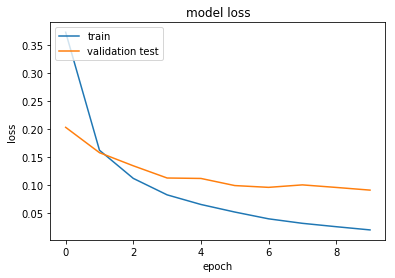

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.9774


In [4]:
from keras.models import Sequential
from keras.layers import Dense # Import the nessesarly layers
from keras.utils import to_categorical

# Remember, you can normalize the data

# TODO: Flatten all images (Both training and testing images)
x_train = x_train.reshape(40000, image.shape[0] * image.shape[1])
x_train_flatten = x_train.astype('float32')/255
x_validate = x_validate.reshape(19999, image.shape[0] * image.shape[1])
x_validate_flatten = x_validate.astype('float32')/255
x_test = x_test.reshape(10000, image.shape[0] * image.shape[1])
x_test_flatten = x_test.astype('float32')/255

# TODO: Convert class vectors to binary class matrices (one-hot encoding)
y_train_one_hot = to_categorical(y_train_entire)
y_train = y_train_one_hot[:40000]
y_validation = y_train_one_hot[40001:]
y_test_one_hot = to_categorical(y_test)


# Returns a compiled model
def fully_connected_model(img_width, img_height):
  model = Sequential()  # Initalize a new model
  model.add(Dense(256, activation='relu', input_shape=(img_width * img_height,)))
  model.add(Dense(10, activation='softmax')) 

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
  # TODO: Add layers, complile the model, and show the structure of the model
  print(model.summary())
  
  return model

model = fully_connected_model(image.shape[0],image.shape[1])  # TODO add input parameters 

# TODO: Train your model (training returns history)
history = model.fit(x_train_flatten, y_train, epochs=10, batch_size=128, validation_data=(x_validate_flatten, y_validation))


# Plot the training using helper function created in task 0
plot_training_score(history)

# TODO: Evaluate your model and print the score of the test set
score = model.evaluate(x_test_flatten, y_test_one_hot)
print('Test accuracy:', score[1])

### Subtask 1.2
1. **Briefly** explain the plot from subtask 1.1
2. **Briefly** justify your model structure from subtask 1.1

**TODO** *Add your answer here*

1. We can see that with higher number of epochs the accuracy is getting higher and the loss is getting lower. After second epoch the train accuracy is getting slightly higher than validation accuracy. Reason for that maybe little overfitting, but even the validation accuracy gets very good results. It is very similar in the loss graph, After second epoch the train loss is getting slightly lower than validation loss. Gap here is indication of overfitting. But the model perform well on the test set, so the overfitting is not problem here.
2. Model uses on hidden layer with 256 neurons and there is 10 neurons in the output layer, which correspond to the ten different catagories (0-9), to which the input picture can be classified. As our NN is classifier, the softmax activation function is used in the output layer. We also tried 512 neurons in the hidden layer, but the result was pretty much the same. The ReLu activation function is used in the hidden layer. Because the accuracy after ten epochs is around 99%, the one hidden layer seems good enough.

## Task 2 (20%): Classification using convolutional layers + fully connected layers (i.e. CNN)
#### Dataset:  [MNIST](http://yann.lecun.com/exdb/mnist/)
### Subtask 2.1
1. Create a model using convolutional layers
2. Print the model structure
3. Visualize the training as it progresses (Task 0) - static plot when training is complete is OK
4. Output the final score of the test set, **should be above 98%**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

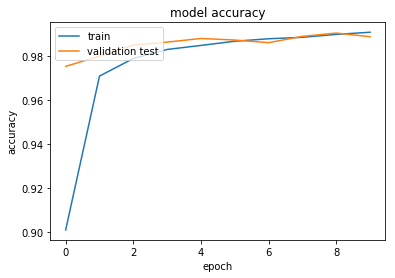

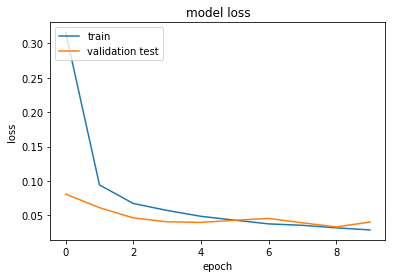

10000/10000 [==============================] - 0s 42us/step
Test accuracy: 0.9899


In [5]:
from keras.models import Sequential
from keras.layers import  MaxPooling2D, Dense, Conv2D, Flatten, Dropout# Import the nessesarly layers
from keras.utils import to_categorical

# TODO: Reshape all images (Both training and testing images) to the following
# format: (total_images, height, width, channel), eg. (4000, 28, 28, 1)
x_train_conv = x_train.reshape((40000, 28, 28, 1))
x_train_conv = x_train_conv.astype('float32')/255
x_validation_conv = x_validate.reshape((19999, 28, 28, 1))
x_validation_conv = x_validation_conv.astype('float32')/255
x_test_conv = x_test.reshape((10000, 28, 28, 1))
x_test_conv = x_test_conv.astype('float32')/255

y_train_one_hot = to_categorical(y_train_entire)
y_train_conv = y_train_one_hot[:40000]
y_validation_conv = y_train_one_hot[40001:]
y_test_conv = to_categorical(y_test)

# Returns a compiled model
def conv_model(img_width, img_height):
  model = Sequential() 
  # TODO: Create the model
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64 ,(3, 3), activation='relu'))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64 ,(3,3), activation='relu'))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))
    
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
  print(model.summary())
  return model

# TODO: Train your model
model = conv_model(image.shape[0],image.shape[1])
history = model.fit(x_train_conv, y_train_conv, epochs=10, batch_size=64, validation_data=(x_validation_conv, y_validation_conv))

# TODO: Plot the training using the helper function created in task 0
plot_training_score(history)

# TODO: Evaluate your model and print the score of the test set
score = model.evaluate(x_test_conv, y_test_conv)
print('Test accuracy:', score[1])


### Subtask 2.2
1. **Briefly** discuss the following concepts of your network: 
  * Filter size
  * Number of filters of each layer
  * Dropout layer (if applicable)
  * Max pooling (if applicable)
  * Regularization (if applicable)
2. **Briefly** justify your model structure from subtask 2.1


**TODO** *Add your answer here*
1. Our filter size is 3x3, which means that filter slides over whole input image and during this sliding, dot products between this filter and chunks of the input image are computed.
The number of filters in conv. layer is number of neurons in this layer. Every single one of these filters forms slightly different output -> feature map. Feature maps allow as to learn significant factors within the image (edges, lines, etc.). We are trying to create enough filters to cover all the important features in the image, but not too much. (Saturation and convergence can be problem then)

In the convolution layer there is 32 filters.
In second  convolution layer there is 64 filters. Usually the number of filters is higher with deeper layer of convolution. The reason is that higher layers represent more generic features, while the deeper layers represent more detailed features. Dropout and max pooling layers do not change the number of filters.

The second hidden layer is max pooling layer. The pool size used here is 2x2. During max pooling there is always picked the highest number from the 2x2 pool size and this is done over whole image. The output size of max pooling layer is 13x13x32. 

Right before dense layers there is dropout layer. Dropout layer drops random sets of neurons in that layer. Number of dropped neurons can be defined. In our case, 0.5 means half of the neurons will be dropped. Dropout is used to reduce overfitting problem in CNNs.

2. Two convolution layer are used to extract features from the input image. Max pooling operation is used to downsample input image, so the more detailed features can be extracted. As the input image is small, two convolutions layers followed by two max pooling layers are enough for feature extraction. Than half of the neurons will be dropped to reduce overfitting. Flattening is needed to use some dense layers after convolutional steps, as dense layer do not have local limitations of convolution layers. This means, that all local features from previous layers can be combined. In the last dense layer we need 10 neurons, which correspond to 10 different categories, to which can be the input image classified

## Task 3 (20%): Cfar10 image contest

#### Dataset:  [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html)

Get as high accuracy as you can on the CIFAR-10 image dataset. 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
Your task is to do this classification using CNN with as high accuracy as you can without using transfer learning / pretrained networks.

More information on this dataset: https://www.cs.toronto.edu/~kriz/cifar.html

**Suggested alterations:** 
  * Number of hidden layers/nodes
  * Number of kernels
  * Number of layers/nodes in the fully connected head 

**NB:** Transfer learning is not allowed in this task




In [2]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten # Import the nessesarly layers
from keras.utils import to_categorical
from keras.optimizers import SGD

(x_train_cfar, y_train_cfar), (x_test_cfar, y_test_cfar) = cifar10.load_data()

 # prepare data in right format
x_train_cfar = x_train_cfar.astype('float32')
x_test_cfar = x_test_cfar.astype('float32')
x_train_cfar = x_train_cfar / 255.0
x_test_cfar = x_test_cfar / 255.0

# prepare labels
y_train_cfar = to_categorical(y_train_cfar)
y_test_cfar = to_categorical(y_test_cfar)


# TODO: Create the model
def cifar_model(img_width, img_height):
    model = Sequential()
 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height,3)))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))
 
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
 
    model.add(Flatten())
    model.add(Dropout(0.2))
    #model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
      
    return model

# Create and compile model
model = cifar_model(32,32)
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=0.01, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# TODO: Train the model, remeber to create a validation set
history = model.fit(x_train_cfar, y_train_cfar, epochs=50, batch_size=64)

# TODO: Plot the training using the helper function created in task 0
#plot_training_score(history)

# TODO: Evaluate your model and print the score of the test set
score = model.evaluate(x_test_cfar, y_test_cfar)
print("Loss: ", score[0], "Accuracy: ", score[1])


Epoch 1/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.1930 - acc: 0.1762
Epoch 2/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.9568 - acc: 0.2889
Epoch 3/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.8029 - acc: 0.3532
Epoch 4/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.6706 - acc: 0.3954
Epoch 5/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5775 - acc: 0.4289
Epoch 6/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5083 - acc: 0.4542
Epoch 7/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.4529 - acc: 0.4764
Epoch 8/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4115 - acc: 0.4922
Epoch 9/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.3644 - acc: 0.5105
Epoch 10/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.3294 - a

## Task 4 (40%) - Classification using transfer learning

#### Dataset:
We have prepared a cat-dog dataset which includes:
- A train set of 1000 cats + 1000 dogs.
- A validation set of 400 cats + 400 dogs.
- A test set of 600 cats + 600 dogs.

The dataset is stored with the following format:
  ```
  ├── dataset
      ├── test600
      │   ├── cat
      │   └── dog
      ├── train1000
      │   ├── cat
      │   └── dog
      └── validation400
          ├── cat
          └── dog
  ```

In [4]:
# Run this code to download the dataset
#%%capture
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE" -O temp.zip && rm -rf /tmp/cookies.txt;
!rm -r dataset; unzip temp.zip -d dataset; rm temp.zip;

--2018-04-09 19:49:53--  https://docs.google.com/uc?export=download&confirm=COjV&id=1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE
Resolving docs.google.com (docs.google.com)... 172.217.20.46, 2a00:1450:400f:806::200e
Connecting to docs.google.com (docs.google.com)|172.217.20.46|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0a7udt89ho342tutqakrhek59cp3ap01/1523289600000/15271511011486018055/*/1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE?e=download [following]
--2018-04-09 19:49:54--  https://doc-00-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0a7udt89ho342tutqakrhek59cp3ap01/1523289600000/15271511011486018055/*/1yKWfuDRrjS09T5rHWIqaKLTYSFJGpdwE?e=download
Resolving doc-00-2o-docs.googleusercontent.com (doc-00-2o-docs.googleusercontent.com)... 172.217.20.33, 2a00:1450:400f:806::2001
Connecting to doc-00-2o-docs.googleusercontent.com (doc-00-2o-

  inflating: dataset/test600/cat/cat.1824.jpg  
  inflating: dataset/test600/cat/cat.1825.jpg  
  inflating: dataset/test600/cat/cat.1826.jpg  
  inflating: dataset/test600/cat/cat.1827.jpg  
  inflating: dataset/test600/cat/cat.1828.jpg  
  inflating: dataset/test600/cat/cat.1829.jpg  
  inflating: dataset/test600/cat/cat.1830.jpg  
  inflating: dataset/test600/cat/cat.1831.jpg  
  inflating: dataset/test600/cat/cat.1832.jpg  
  inflating: dataset/test600/cat/cat.1833.jpg  
  inflating: dataset/test600/cat/cat.1834.jpg  
  inflating: dataset/test600/cat/cat.1835.jpg  
  inflating: dataset/test600/cat/cat.1836.jpg  
  inflating: dataset/test600/cat/cat.1837.jpg  
  inflating: dataset/test600/cat/cat.1838.jpg  
  inflating: dataset/test600/cat/cat.1839.jpg  
  inflating: dataset/test600/cat/cat.1840.jpg  
  inflating: dataset/test600/cat/cat.1841.jpg  
  inflating: dataset/test600/cat/cat.1842.jpg  
  inflating: dataset/test600/cat/cat.1843.jpg  
  inflating: dataset/test600/cat/cat.184

  inflating: dataset/test600/dog/dog.1576.jpg  
  inflating: dataset/test600/dog/dog.1577.jpg  
  inflating: dataset/test600/dog/dog.1578.jpg  
  inflating: dataset/test600/dog/dog.1579.jpg  
  inflating: dataset/test600/dog/dog.1580.jpg  
  inflating: dataset/test600/dog/dog.1581.jpg  
  inflating: dataset/test600/dog/dog.1582.jpg  
  inflating: dataset/test600/dog/dog.1583.jpg  
  inflating: dataset/test600/dog/dog.1584.jpg  
  inflating: dataset/test600/dog/dog.1585.jpg  
  inflating: dataset/test600/dog/dog.1586.jpg  
  inflating: dataset/test600/dog/dog.1587.jpg  
  inflating: dataset/test600/dog/dog.1588.jpg  
  inflating: dataset/test600/dog/dog.1589.jpg  
  inflating: dataset/test600/dog/dog.1590.jpg  
  inflating: dataset/test600/dog/dog.1591.jpg  
  inflating: dataset/test600/dog/dog.1592.jpg  
  inflating: dataset/test600/dog/dog.1593.jpg  
  inflating: dataset/test600/dog/dog.1594.jpg  
  inflating: dataset/test600/dog/dog.1595.jpg  
  inflating: dataset/test600/dog/dog.159

  inflating: dataset/test600/dog/dog.1893.jpg  
  inflating: dataset/test600/dog/dog.1894.jpg  
  inflating: dataset/test600/dog/dog.1895.jpg  
  inflating: dataset/test600/dog/dog.1896.jpg  
  inflating: dataset/test600/dog/dog.1897.jpg  
  inflating: dataset/test600/dog/dog.1898.jpg  
  inflating: dataset/test600/dog/dog.1899.jpg  
  inflating: dataset/test600/dog/dog.1900.jpg  
  inflating: dataset/test600/dog/dog.1901.jpg  
  inflating: dataset/test600/dog/dog.1902.jpg  
  inflating: dataset/test600/dog/dog.1903.jpg  
  inflating: dataset/test600/dog/dog.1904.jpg  
  inflating: dataset/test600/dog/dog.1905.jpg  
  inflating: dataset/test600/dog/dog.1906.jpg  
  inflating: dataset/test600/dog/dog.1907.jpg  
  inflating: dataset/test600/dog/dog.1908.jpg  
  inflating: dataset/test600/dog/dog.1909.jpg  
  inflating: dataset/test600/dog/dog.1910.jpg  
  inflating: dataset/test600/dog/dog.1911.jpg  
  inflating: dataset/test600/dog/dog.1912.jpg  
  inflating: dataset/test600/dog/dog.191

  inflating: dataset/train1000/cat/cat.326.jpg  
  inflating: dataset/train1000/cat/cat.327.jpg  
  inflating: dataset/train1000/cat/cat.328.jpg  
  inflating: dataset/train1000/cat/cat.329.jpg  
  inflating: dataset/train1000/cat/cat.33.jpg  
  inflating: dataset/train1000/cat/cat.330.jpg  
  inflating: dataset/train1000/cat/cat.331.jpg  
  inflating: dataset/train1000/cat/cat.332.jpg  
  inflating: dataset/train1000/cat/cat.333.jpg  
  inflating: dataset/train1000/cat/cat.334.jpg  
  inflating: dataset/train1000/cat/cat.335.jpg  
  inflating: dataset/train1000/cat/cat.336.jpg  
  inflating: dataset/train1000/cat/cat.337.jpg  
  inflating: dataset/train1000/cat/cat.338.jpg  
  inflating: dataset/train1000/cat/cat.339.jpg  
  inflating: dataset/train1000/cat/cat.34.jpg  
  inflating: dataset/train1000/cat/cat.340.jpg  
  inflating: dataset/train1000/cat/cat.341.jpg  
  inflating: dataset/train1000/cat/cat.342.jpg  
  inflating: dataset/train1000/cat/cat.343.jpg  
  inflating: dataset/t

  inflating: dataset/train1000/cat/cat.651.jpg  
  inflating: dataset/train1000/cat/cat.652.jpg  
  inflating: dataset/train1000/cat/cat.653.jpg  
  inflating: dataset/train1000/cat/cat.654.jpg  
  inflating: dataset/train1000/cat/cat.655.jpg  
  inflating: dataset/train1000/cat/cat.656.jpg  
  inflating: dataset/train1000/cat/cat.657.jpg  
  inflating: dataset/train1000/cat/cat.658.jpg  
  inflating: dataset/train1000/cat/cat.659.jpg  
  inflating: dataset/train1000/cat/cat.66.jpg  
  inflating: dataset/train1000/cat/cat.660.jpg  
  inflating: dataset/train1000/cat/cat.661.jpg  
  inflating: dataset/train1000/cat/cat.662.jpg  
  inflating: dataset/train1000/cat/cat.663.jpg  
  inflating: dataset/train1000/cat/cat.664.jpg  
  inflating: dataset/train1000/cat/cat.665.jpg  
  inflating: dataset/train1000/cat/cat.666.jpg  
  inflating: dataset/train1000/cat/cat.667.jpg  
  inflating: dataset/train1000/cat/cat.668.jpg  
  inflating: dataset/train1000/cat/cat.669.jpg  
  inflating: dataset/

  inflating: dataset/train1000/cat/cat.970.jpg  
  inflating: dataset/train1000/cat/cat.971.jpg  
  inflating: dataset/train1000/cat/cat.972.jpg  
  inflating: dataset/train1000/cat/cat.973.jpg  
  inflating: dataset/train1000/cat/cat.974.jpg  
  inflating: dataset/train1000/cat/cat.975.jpg  
  inflating: dataset/train1000/cat/cat.976.jpg  
  inflating: dataset/train1000/cat/cat.977.jpg  
  inflating: dataset/train1000/cat/cat.978.jpg  
  inflating: dataset/train1000/cat/cat.979.jpg  
  inflating: dataset/train1000/cat/cat.98.jpg  
  inflating: dataset/train1000/cat/cat.980.jpg  
  inflating: dataset/train1000/cat/cat.981.jpg  
  inflating: dataset/train1000/cat/cat.982.jpg  
  inflating: dataset/train1000/cat/cat.983.jpg  
  inflating: dataset/train1000/cat/cat.984.jpg  
  inflating: dataset/train1000/cat/cat.985.jpg  
  inflating: dataset/train1000/cat/cat.986.jpg  
  inflating: dataset/train1000/cat/cat.987.jpg  
  inflating: dataset/train1000/cat/cat.988.jpg  
  inflating: dataset/

  inflating: dataset/train1000/dog/dog.354.jpg  
  inflating: dataset/train1000/dog/dog.355.jpg  
  inflating: dataset/train1000/dog/dog.356.jpg  
  inflating: dataset/train1000/dog/dog.357.jpg  
  inflating: dataset/train1000/dog/dog.358.jpg  
  inflating: dataset/train1000/dog/dog.359.jpg  
  inflating: dataset/train1000/dog/dog.36.jpg  
  inflating: dataset/train1000/dog/dog.360.jpg  
  inflating: dataset/train1000/dog/dog.361.jpg  
  inflating: dataset/train1000/dog/dog.362.jpg  
  inflating: dataset/train1000/dog/dog.363.jpg  
  inflating: dataset/train1000/dog/dog.364.jpg  
  inflating: dataset/train1000/dog/dog.365.jpg  
  inflating: dataset/train1000/dog/dog.366.jpg  
  inflating: dataset/train1000/dog/dog.367.jpg  
  inflating: dataset/train1000/dog/dog.368.jpg  
  inflating: dataset/train1000/dog/dog.369.jpg  
  inflating: dataset/train1000/dog/dog.37.jpg  
  inflating: dataset/train1000/dog/dog.370.jpg  
  inflating: dataset/train1000/dog/dog.371.jpg  
  inflating: dataset/t

  inflating: dataset/train1000/dog/dog.631.jpg  
  inflating: dataset/train1000/dog/dog.632.jpg  
  inflating: dataset/train1000/dog/dog.633.jpg  
  inflating: dataset/train1000/dog/dog.634.jpg  
  inflating: dataset/train1000/dog/dog.635.jpg  
  inflating: dataset/train1000/dog/dog.636.jpg  
  inflating: dataset/train1000/dog/dog.637.jpg  
  inflating: dataset/train1000/dog/dog.638.jpg  
  inflating: dataset/train1000/dog/dog.639.jpg  
  inflating: dataset/train1000/dog/dog.64.jpg  
  inflating: dataset/train1000/dog/dog.640.jpg  
  inflating: dataset/train1000/dog/dog.641.jpg  
  inflating: dataset/train1000/dog/dog.642.jpg  
  inflating: dataset/train1000/dog/dog.643.jpg  
  inflating: dataset/train1000/dog/dog.644.jpg  
  inflating: dataset/train1000/dog/dog.645.jpg  
  inflating: dataset/train1000/dog/dog.646.jpg  
  inflating: dataset/train1000/dog/dog.647.jpg  
  inflating: dataset/train1000/dog/dog.648.jpg  
  inflating: dataset/train1000/dog/dog.649.jpg  
  inflating: dataset/

  inflating: dataset/train1000/dog/dog.903.jpg  
  inflating: dataset/train1000/dog/dog.904.jpg  
  inflating: dataset/train1000/dog/dog.905.jpg  
  inflating: dataset/train1000/dog/dog.906.jpg  
  inflating: dataset/train1000/dog/dog.907.jpg  
  inflating: dataset/train1000/dog/dog.908.jpg  
  inflating: dataset/train1000/dog/dog.909.jpg  
  inflating: dataset/train1000/dog/dog.91.jpg  
  inflating: dataset/train1000/dog/dog.910.jpg  
  inflating: dataset/train1000/dog/dog.911.jpg  
  inflating: dataset/train1000/dog/dog.912.jpg  
  inflating: dataset/train1000/dog/dog.913.jpg  
  inflating: dataset/train1000/dog/dog.914.jpg  
  inflating: dataset/train1000/dog/dog.915.jpg  
  inflating: dataset/train1000/dog/dog.916.jpg  
  inflating: dataset/train1000/dog/dog.917.jpg  
  inflating: dataset/train1000/dog/dog.918.jpg  
  inflating: dataset/train1000/dog/dog.919.jpg  
  inflating: dataset/train1000/dog/dog.92.jpg  
  inflating: dataset/train1000/dog/dog.920.jpg  
  inflating: dataset/t

  inflating: dataset/validation400/cat/cat.1242.jpg  
  inflating: dataset/validation400/cat/cat.1243.jpg  
  inflating: dataset/validation400/cat/cat.1244.jpg  
  inflating: dataset/validation400/cat/cat.1245.jpg  
  inflating: dataset/validation400/cat/cat.1246.jpg  
  inflating: dataset/validation400/cat/cat.1247.jpg  
  inflating: dataset/validation400/cat/cat.1248.jpg  
  inflating: dataset/validation400/cat/cat.1249.jpg  
  inflating: dataset/validation400/cat/cat.1250.jpg  
  inflating: dataset/validation400/cat/cat.1251.jpg  
  inflating: dataset/validation400/cat/cat.1252.jpg  
  inflating: dataset/validation400/cat/cat.1253.jpg  
  inflating: dataset/validation400/cat/cat.1254.jpg  
  inflating: dataset/validation400/cat/cat.1255.jpg  
  inflating: dataset/validation400/cat/cat.1256.jpg  
  inflating: dataset/validation400/cat/cat.1257.jpg  
  inflating: dataset/validation400/cat/cat.1258.jpg  
  inflating: dataset/validation400/cat/cat.1259.jpg  
  inflating: dataset/validat

  inflating: dataset/validation400/dog/dog.1182.jpg  
  inflating: dataset/validation400/dog/dog.1183.jpg  
  inflating: dataset/validation400/dog/dog.1184.jpg  
  inflating: dataset/validation400/dog/dog.1185.jpg  
  inflating: dataset/validation400/dog/dog.1186.jpg  
  inflating: dataset/validation400/dog/dog.1187.jpg  
  inflating: dataset/validation400/dog/dog.1188.jpg  
  inflating: dataset/validation400/dog/dog.1189.jpg  
  inflating: dataset/validation400/dog/dog.1190.jpg  
  inflating: dataset/validation400/dog/dog.1191.jpg  
  inflating: dataset/validation400/dog/dog.1192.jpg  
  inflating: dataset/validation400/dog/dog.1193.jpg  
  inflating: dataset/validation400/dog/dog.1194.jpg  
  inflating: dataset/validation400/dog/dog.1195.jpg  
  inflating: dataset/validation400/dog/dog.1196.jpg  
  inflating: dataset/validation400/dog/dog.1197.jpg  
  inflating: dataset/validation400/dog/dog.1198.jpg  
  inflating: dataset/validation400/dog/dog.1199.jpg  
  inflating: dataset/validat

### Subtask 4.1

- Download a pretrained convolutionary neural network (e.g. VGG16) (and problem specific weights).
- Freeze a subset of upper layers weights.
- Train on the cat-dog dataset with a fresh fully connected head.
- If needed use data augmentation and any other technique to increase your accuracy.

**NB:** The images are not of equal size

Model loaded.
Found 2002 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 2s 1000us/step - loss: 0.6610 - acc: 0.6120 - val_loss: 0.5468 - val_acc: 0.7512
Epoch 2/50
2000/2000 [==============================] - 0s 234us/step - loss: 0.5110 - acc: 0.7660 - val_loss: 0.4602 - val_acc: 0.8263
Epoch 3/50
2000/2000 [==============================] - 0s 243us/step - loss: 0.4536 - acc: 0.8005 - val_loss: 0.4178 - val_acc: 0.8425
Epoch 4/50
2000/2000 [==============================] - 0s 239us/step - loss: 0.4232 - acc: 0.8135 - val_loss: 0.3881 - val_acc: 0.8600
Epoch 5/50
2000/2000 [==============================] - 0s 245us/step - loss: 0.4038 - acc: 0.8300 - val_loss: 0.3680 - val_acc: 0.8550
Epoch 6/50
2000/2000 [==============================] - 0s 246us/step - loss: 0.3768 - acc: 0.8400 - val_loss: 0.3534 - val_acc: 0.8650
Epoch 7/50
2000/2000 [=================

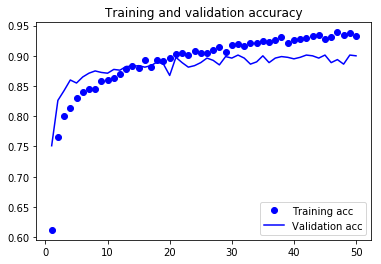

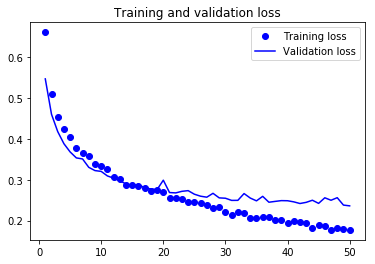

In [11]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Model
from keras import applications
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import os, cv2, random


#Dimensions of our images
img_width, img_height = 150, 150
top_model_weights_path = 'fc_model.h5'


test_data_dir = 'dataset/test600'
train_data_dir = 'dataset/train1000'
validation_data_dir = 'dataset/validation400'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

#Data generators
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
    
#Building the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')
print('Model loaded.')



train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
    
features_train = model.predict_generator(train_generator, nb_train_samples // batch_size)
np.save('features_train', features_train)
    
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
    
features_validation = model.predict_generator(validation_generator, nb_validation_samples // batch_size)
np.save('features_validation', features_validation)


train_data = np.load('features_train.npy')
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load('features_validation.npy')
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

#Freeze subset of upper layers
for layer in model.layers[:15]:
    layer.trainable = False

#Added top model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#Uncomment to run on initially untrained top model
#model.load_weights(top_model_weights_path)

#Fine tuning
model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              loss='binary_crossentropy', 
              metrics=['accuracy'])


history = model.fit(train_data, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(validation_data, validation_labels))
    
model.save_weights(top_model_weights_path)
    
#Plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epoch = range(1, len(acc) + 1)
    
plt.plot(epoch, acc, 'bo', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()
    
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
    
plt.show()





### Subtask 4.2
1. Output the resulting accuracy and **briefly** explain what you have done.
2. Perform (between 2 to 5) different experiments of different hyper parameters, different model designs, different activation functions, etc. Then report the following: 

>> 2.1. **Briefly** explain your models and make a comparison table of the accuracies you got. 


>> 2.2. Explain why and which experiments performed better/worse than the others.

**TODO** *Add your answer here*

Answers:

>>2.1 The first example consists of the VGG16 pretrained model that is trained on the imagenet training dataset. The model freezes most of the layers and adds a top layer on top of the frozen layers. Decent results were achieved by fine tuning with the SGD optimizer with a slow learning rate. The training accuracy with a pretrained base model and an initially untrained top model was about 94% after 50 epochs, which is very good. The code also gives the option to save the weights for the top model by always loading the weights for the top model, which of course results in better accuracy each time you run the code. The second test consists of the VGG19 model trained in imageNet with the RMSprop optimizer. Lastly the third test is the ResNet50 model with the same SGD optimzer as in the VGG16 test. 

VGG16 with SGD optimizer:
<img src='image1.png'>
<img src='image2.png'>

VGG19 with RMSprop optimizer:
<img src='image5.png'>
<img src='image6.png'>

ResNet50 with SGD optimizer:
<img src='image7.png'>
<img src='image8.png'>

>>2.2 As we can see, the VGG16 pretrained model performs best of these models due to that is has the best predefined model that consists of 16 layers, and in combination with the added top layer and the optimizer gives a very good result.


Model loaded.
Found 2002 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 1s 473us/step - loss: 0.7414 - acc: 0.5175 - val_loss: 0.6835 - val_acc: 0.5350
Epoch 2/50
2000/2000 [==============================] - 0s 189us/step - loss: 0.6924 - acc: 0.5390 - val_loss: 0.6799 - val_acc: 0.5000
Epoch 3/50
2000/2000 [==============================] - 0s 187us/step - loss: 0.6878 - acc: 0.5465 - val_loss: 0.6723 - val_acc: 0.5188
Epoch 4/50
2000/2000 [==============================] - 0s 184us/step - loss: 0.6844 - acc: 0.5535 - val_loss: 0.6711 - val_acc: 0.5100
Epoch 5/50
2000/2000 [==============================] - 0s 185us/step - loss: 0.6813 - acc: 0.5610 - val_loss: 0.6684 - val_acc: 0.5962
Epoch 6/50
2000/2000 [==============================] - 0s 181us/step - loss: 0.6785 - acc: 0.5565 - val_loss: 0.6611 - val_acc: 0.6300
Epoch 7/50
2000/2000 [==================

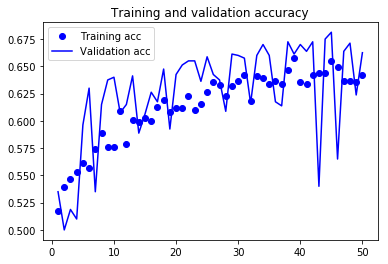

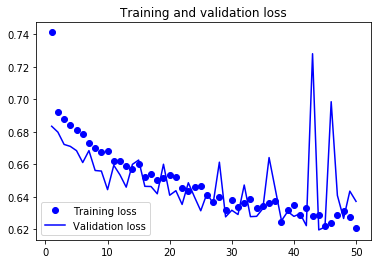

In [6]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Model
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import os, cv2, random

#Dimensions of our images
img_width, img_height = 244, 244
top_model_weights_path = 'vgg19_model.h5'


test_data_dir = 'dataset/test600'
train_data_dir = 'dataset/train1000'
validation_data_dir = 'dataset/validation400'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16


datagen = ImageDataGenerator(rescale=1. / 255)
    
#Building the VGG16 network
model = applications.ResNet50(include_top=False, weights='imagenet')
print('Model loaded.')
    
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
    
features_train = model.predict_generator(train_generator, nb_train_samples // batch_size)
np.save('features_train', features_train)
    
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
    
features_validation = model.predict_generator(validation_generator, nb_validation_samples // batch_size)
np.save('features_validation', features_validation)


train_data = np.load('features_train.npy')
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load('features_validation.npy')
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))


#Freeze subset of upper layers
for layer in model.layers[:15]:
    layer.trainable = False    
    
    
#Top model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#Uncomment to run on initially trained top model
#model.load_weights(top_model_weights_path)

model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(validation_data, validation_labels))
    
model.save_weights(top_model_weights_path)
    
#Plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epoch = range(1, len(acc) + 1)
    
plt.plot(epoch, acc, 'bo', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()
    
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
    
plt.show()

Model loaded.
Found 2002 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 2s 945us/step - loss: 0.7373 - acc: 0.5015 - val_loss: 0.6871 - val_acc: 0.5625
Epoch 2/50
2000/2000 [==============================] - 0s 202us/step - loss: 0.7389 - acc: 0.4920 - val_loss: 0.6851 - val_acc: 0.5775
Epoch 3/50
2000/2000 [==============================] - 0s 203us/step - loss: 0.7185 - acc: 0.5200 - val_loss: 0.6832 - val_acc: 0.5813
Epoch 4/50
2000/2000 [==============================] - 0s 201us/step - loss: 0.7040 - acc: 0.5115 - val_loss: 0.6855 - val_acc: 0.5288
Epoch 5/50
2000/2000 [==============================] - 0s 202us/step - loss: 0.6929 - acc: 0.5380 - val_loss: 0.6829 - val_acc: 0.5425
Epoch 6/50
2000/2000 [==============================] - 0s 202us/step - loss: 0.6982 - acc: 0.5245 - val_loss: 0.6799 - val_acc: 0.5600
Epoch 7/50
2000/2000 [==================

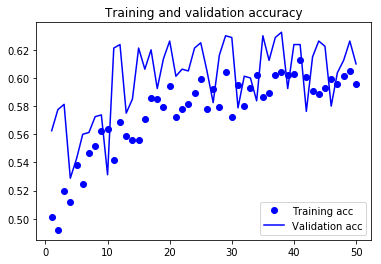

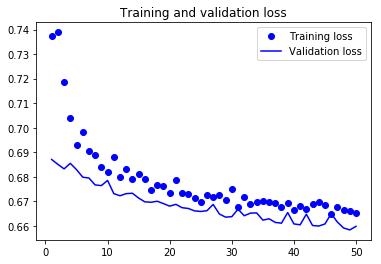

In [9]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Model
from keras import optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import os, cv2, random

#Dimensions of our images
img_width, img_height = 244, 244
top_model_weights_path = 'resnet_model.h5'


test_data_dir = 'dataset/test600'
train_data_dir = 'dataset/train1000'
validation_data_dir = 'dataset/validation400'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16


datagen = ImageDataGenerator(rescale=1. / 255)
    
#Building the VGG16 network
model = applications.ResNet50(include_top=False, weights='imagenet')
print('Model loaded.')
    
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
    
features_train = model.predict_generator(train_generator, nb_train_samples // batch_size)
np.save('features_train', features_train)
    
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
    
features_validation = model.predict_generator(validation_generator, nb_validation_samples // batch_size)
np.save('features_validation', features_validation)


train_data = np.load('features_train.npy')
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load('features_validation.npy')
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))


#Freeze subset of upper layers
for layer in model.layers[:15]:
    layer.trainable = False    
    
    
#Top model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

#Uncomment to run on initially trained top model
#model.load_weights(top_model_weights_path)

model.compile(optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

history = model.fit(train_data, train_labels,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=(validation_data, validation_labels))
    
model.save_weights(top_model_weights_path)
    
#Plotting
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
    
epoch = range(1, len(acc) + 1)
    
plt.plot(epoch, acc, 'bo', label='Training acc')
plt.plot(epoch, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
    
plt.figure()
    
plt.plot(epoch, loss, 'bo', label='Training loss')
plt.plot(epoch, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
    
plt.show()